In [41]:
import os
import sys
current_file_path = os.path.abspath(os.getcwd())
ImageExplainer_path = os.path.join(os.path.join(current_file_path, "Examples"),"ImageExplainer")
sys.path.append(ImageExplainer_path)


from missingDataTrainingModule import *
from torch.distributions import *
from torch.optim import *
from datasets import *
from missingDataTrainingModule.EpochsScheduler import classic_train_epoch

from multiple_experiment_launcher import get_dataset
from default_parameter import get_default




# Choose Dataset

In [42]:
args = get_default()

args.args_dataset.dataset = "MNIST_and_FASHIONMNIST"
args.args_dataset.args_dataset_parameters.train_seed = 0
args.args_dataset.args_dataset_parameters.test_seed = 1

dataset, loader = get_dataset(args)


# Building blocks

## Choose networks :

In [43]:
# Choose the kernel for the creation of patches for the selection :
kernel_size = (1,1)
kernel_stride = (1,1)
add_mask = False
dim_output = dataset.get_dim_output()


# Choose the network for prediction :
input_size_classifier = dataset.get_dim_input()
if add_mask :
    init_shape = dataset.get_dim_input()
    input_size_classifier = torch.Size((init_shape[0]+1,)) + torch.Size((init_shape[1:]))


# Choose network for selection :
classifier = ConvClassifier2(input_size=input_size_classifier, output_size=dim_output,)
input_size_selector = dataset.get_dim_input()
output_size_selector = calculate_blocks_patch(input_size_selector, kernel_size, kernel_stride)
selector = SelectorUNET(input_size=input_size_selector, output_size=output_size_selector,)

# Reshape the patch to the original shape :
reshape_mask_function = KernelReshape2D(input_size_classifier = input_size_classifier,
                                                                    output_size_selector = output_size_selector,
                                                                    kernel_size = kernel_size,
                                                                    kernel_stride = kernel_stride)



## Imputation method :

In [44]:
# Choose the model for the imputation :
mixture_of_logistics = train_MixtureOfLogistics(loader, # Dataset loader
                                        model_dir=None,
                                        nb_component = 20, # Number of component for the mixture
                                        epochs = 10,
                                        transform_mean = 0, # Parameters to reconstruct the data
                                        transform_std = 255,
                                        batch_size = 64,
                                        lr = 1e-4,
                                        verbose=False)


multiple_imputation_module = MixtureOfLogisticsImputation(mixture=mixture_of_logistics, mean_imputation=False)


TRAINING FROM MODEL DIR None
Learning rate : 0.0001
type of training : sgd
Repartition after kmeans : tensor([0.0210, 0.0582, 0.0208, 0.0547, 0.0669, 0.0598, 0.0432, 0.0841, 0.0432,
        0.0813, 0.0436, 0.0477, 0.0682, 0.0514, 0.0209, 0.0570, 0.0793, 0.0213,
        0.0585, 0.0187])
Weights after kmeans : [0.02097917 0.05822916 0.02083334 0.05474999 0.066875   0.05977083
 0.04325    0.08414582 0.04320833 0.08131249 0.043625   0.04775
 0.06820834 0.05139584 0.02091667 0.05704166 0.07925    0.02125
 0.05852083 0.01868751]


16it [00:00, 570.13it/s]


Validation Epoch -1 / 10
Validation Loss : 3829.645263671875
Repartition centers : tensor([ 25., 101.,  20.,  21.,  83.,  71.,  48.,  74.,  35.,  90.,  60.,  47.,
         84.,  57.,  24.,  44.,  40.,  19.,  36.,  21.], device='cuda:0')
Epoch 0


750it [00:04, 179.38it/s]
16it [00:00, 494.47it/s]


Validation Epoch 0 / 10
Validation Loss : 3784.876708984375
Repartition centers : tensor([ 22., 100.,  20.,  22.,  83.,  70.,  39.,  74.,  37.,  90.,  63.,  46.,
         85.,  56.,  24.,  44.,  50.,  19.,  36.,  20.], device='cuda:0')
Epoch 1


750it [00:04, 175.96it/s]
16it [00:00, 466.89it/s]


Validation Epoch 1 / 10
Validation Loss : 3765.67724609375
Repartition centers : tensor([ 23., 100.,  20.,  22.,  83.,  70.,  39.,  76.,  39.,  90.,  63.,  46.,
         83.,  56.,  24.,  42.,  49.,  19.,  36.,  20.], device='cuda:0')
Epoch 2


750it [00:04, 169.61it/s]
16it [00:00, 474.63it/s]


Validation Epoch 2 / 10
Validation Loss : 3751.8720703125
Repartition centers : tensor([ 23., 100.,  20.,  22.,  83.,  70.,  37.,  76.,  38.,  89.,  65.,  46.,
         83.,  56.,  24.,  42.,  50.,  19.,  37.,  20.], device='cuda:0')
Epoch 3


750it [00:04, 177.96it/s]
16it [00:00, 511.93it/s]


Validation Epoch 3 / 10
Validation Loss : 3740.9912109375
Repartition centers : tensor([24., 99., 20., 22., 83., 70., 36., 76., 40., 87., 66., 47., 81., 56.,
        24., 41., 52., 19., 37., 20.], device='cuda:0')
Epoch 4


750it [00:04, 171.56it/s]
16it [00:00, 511.75it/s]


Validation Epoch 4 / 10
Validation Loss : 3731.99072265625
Repartition centers : tensor([24., 99., 19., 23., 83., 70., 36., 76., 40., 87., 66., 46., 80., 56.,
        24., 41., 53., 19., 38., 20.], device='cuda:0')
Epoch 5


750it [00:04, 176.02it/s]
16it [00:00, 519.66it/s]


Validation Epoch 5 / 10
Validation Loss : 3724.40380859375
Repartition centers : tensor([24., 98., 19., 23., 82., 70., 36., 76., 40., 87., 66., 47., 80., 56.,
        24., 41., 53., 19., 39., 20.], device='cuda:0')
Epoch 6


750it [00:04, 172.59it/s]
16it [00:00, 534.03it/s]


Validation Epoch 6 / 10
Validation Loss : 3717.9736328125
Repartition centers : tensor([27., 98., 19., 23., 82., 70., 34., 75., 40., 85., 66., 47., 80., 56.,
        23., 42., 55., 19., 39., 20.], device='cuda:0')
Epoch 7


750it [00:04, 171.09it/s]
16it [00:00, 461.04it/s]


Validation Epoch 7 / 10
Validation Loss : 3712.444580078125
Repartition centers : tensor([27., 97., 19., 23., 84., 67., 34., 75., 41., 85., 66., 48., 80., 56.,
        23., 42., 55., 19., 39., 20.], device='cuda:0')
Epoch 8


750it [00:04, 177.96it/s]
16it [00:00, 428.87it/s]


Validation Epoch 8 / 10
Validation Loss : 3707.639404296875
Repartition centers : tensor([27., 97., 19., 24., 84., 67., 33., 73., 41., 85., 65., 47., 80., 56.,
        23., 43., 58., 19., 39., 20.], device='cuda:0')
Epoch 9


750it [00:04, 169.09it/s]
16it [00:00, 489.71it/s]

Validation Epoch 9 / 10
Validation Loss : 3703.4296875
Repartition centers : tensor([27., 97., 19., 26., 84., 67., 33., 72., 40., 85., 66., 45., 80., 56.,
        23., 41., 60., 19., 40., 20.], device='cuda:0')


In [45]:
imputation = ModuleImputation(
                module=multiple_imputation_module,
                add_mask = add_mask,
            )
imputation.requires_grad_(False)


ModuleImputation(
  (module): MixtureOfLogisticsImputation(
    (mixture): MixtureOfLogistics()
  )
)

## Regularization (if any)

In [46]:
regularization = None
# In case of subset sampling, regularization = None.

## Distribution for the selection module (associated with the MC gradient estimator)

In [47]:
rate = 0.1
nb_dim = np.prod(next(iter(loader.train_loader))[0][0].shape)
from missingDataTrainingModule import PytorchDistributionUtils
distribution = partial(PytorchDistributionUtils.distribution.RelaxedSubsetSampling_STE, k = int(rate * nb_dim))
distribution_module = PytorchDistributionUtils.wrappers.DistributionWithTemperatureParameter(distribution=distribution,)

## Larger modules 

In [48]:
prediction_module = PredictionModule(classifier, imputation=imputation, input_size=dataset.get_dim_input(),)
selection_module = SelectionModule(selector, regularization=regularization, activation=torch.nn.LogSigmoid())

In [49]:
interpretable_module = COUPLED_SELECTION(prediction_module,
                                selection_module,
                                distribution_module,
                                reshape_mask_function)

## Trainer

In [50]:
loss_function = NLLLossAugmented(reduction='none')  # We need to use a wrapper around the loss function to be able
                                                    # to handle the importance samples.
monte_carlo_gradient_estimator = PytorchDistributionUtils.gradientestimator.PathWise


trainer = SINGLE_LOSS(interpretable_module = interpretable_module,
            monte_carlo_gradient_estimator= monte_carlo_gradient_estimator,
            loss_function = loss_function,
            nb_sample_z_monte_carlo = 1,
            nb_sample_z_iwae = 10)
if torch.cuda.is_available():
    trainer.cuda()

# Training

In [51]:
optim_prediction = Adam(prediction_module.parameters(), lr=1e-4)
scheduler_prediction = None
optim_selection = Adam(selection_module.parameters(), lr=1e-4)
scheduler_selection = None
nb_epoch = 40

trainer.compile(
            optim_classification = optim_prediction,
            optim_selection = optim_selection,
            scheduler_classification = scheduler_prediction,
            scheduler_selection = scheduler_selection,
            )

In [ ]:
epoch_scheduler = classic_train_epoch(save_dic = False, verbose=True,)


best_train_loss_in_test = float("inf")
total_dic_train = {}
total_dic_test = {}
for epoch in range(nb_epoch):
    dic_train = epoch_scheduler(epoch, loader, trainer)
    total_dic_train = fill_dic(total_dic_train, dic_train)
    with torch.no_grad():
        dic_test = test_epoch(interpretable_module, epoch, loader, liste_mc = [(1,1,1,1)], trainer = trainer, use_cuda=True)
        total_dic_test = fill_dic(total_dic_test, dic_test)


In [53]:
from interpretation_image import get_enough_data_per_target
indexes, data, target, quadrant = get_enough_data_per_target(loader, 1)
target, indices = torch.sort(target)
data = data[indices]
quadrant = quadrant[indices]
wanted_shape = data.shape[1:]

with torch.no_grad():
    log_pi_list,_ = interpretable_module.selection_module(data.cuda())
    pi_list = torch.exp(log_pi_list)
    pi_list_selected = get_sel_pred(interpretable_module, pi_list, rate = None)
    pz = interpretable_module.distribution_module(torch.exp(log_pi_list))


    pi_list_selected = interpretable_module.reshape(pi_list_selected)
    pi_list = interpretable_module.reshape(pi_list)

    z = interpretable_module.distribution_module.sample((100,))
    pi_list_sampled = z.mean(dim=0).detach().cpu()
    pi_list_sampled = interpretable_module.reshape(pi_list_sampled)



# Explanations 

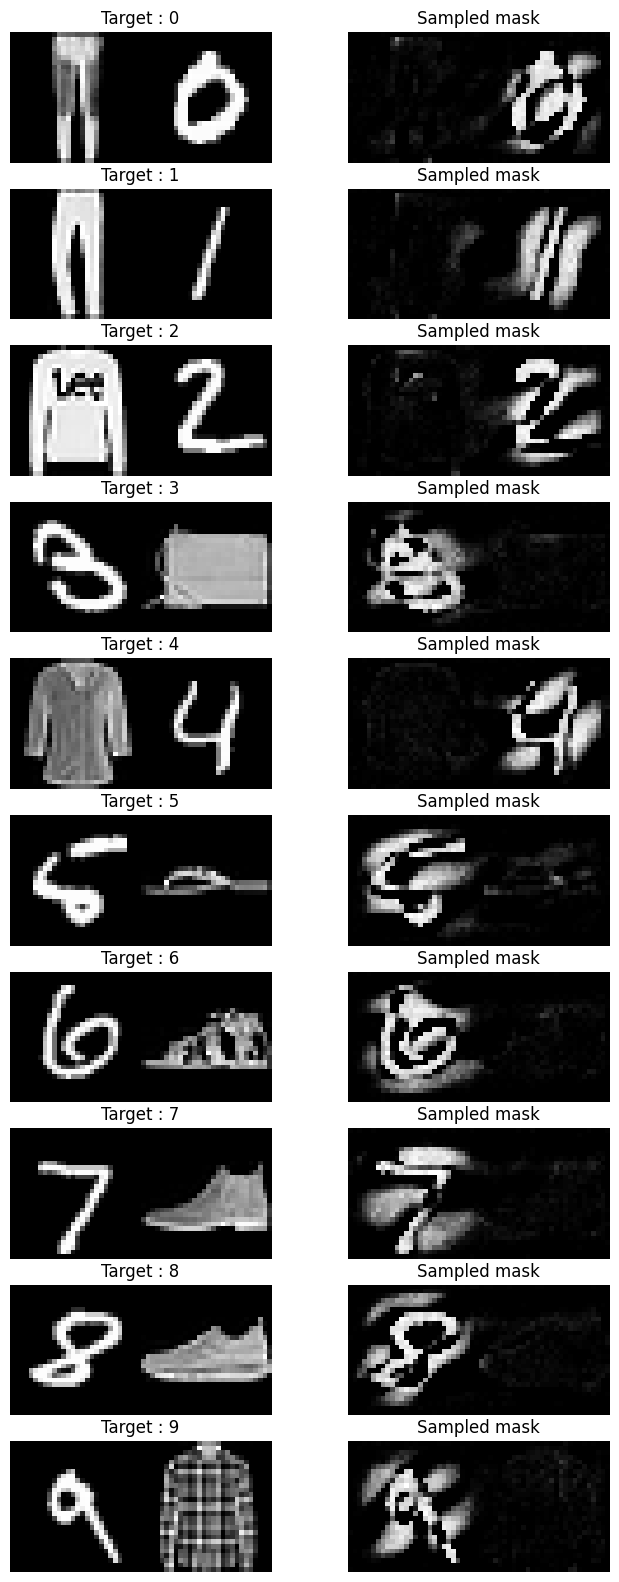

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(10,2, figsize=(8,20))
for k in range(10) :
    ax[k,0].imshow(data[k].reshape((28,56)), cmap = "gray")
    ax[k,1].imshow(pi_list_sampled[k].reshape((28,56)), cmap = "gray")
    ax[k,0].set_title("Target : {}".format(target[k]))
    ax[k,1].set_title("Sampled mask")
    ax[k,0].axis("off")
    ax[k,1].axis("off")
plt.show()